In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
%matplotlib inline

pi = np.pi

plt.rcParams['font.size'] = 40
plt.rcParams['figure.figsize'] = (40, 10)
plt.rcParams['lines.linewidth'] = 2.0

# Aufgabe 11: Zeitkontinuierliche Zufallsprozesse

Gegeben sei der abgebildete Phasensplitter mit Hilberttransformator $h_{H}(t)$, an dessen Eingang das reelle Bandpasssignal

\begin{align}
    X(t) = B \sin(\omega_0 t + \Theta)
\end{align}

anliegt. Das Bandpasssignal wird als Zufallsprozess mit deterministischer Kreisfrequenz $\omega_0$, zufälliger Amplitude $B$ und zufälliger Phase $\Theta$ modelliert. Die zufällige Amplitude $B$ habe die Verteilungsdichtefunktion $p_B(b) = \mathcal{N}(b; \mu_B, \sigma_B^2)$. Die Phase $\Theta$ sei gleichverteilt im Intervall $[-\pi,+\pi[$. Amplitude $B$ und Phase $\Theta$ seien dabei statistisch unabhängig.

![Blockschaltbild](figures/A11/System_Blockdiagramm.png)

#### Hinweis:

\begin{align}
    \sin(a)\sin(b) = \frac{1}{2}\left( \cos(a-b) - cos(a+b) \right)
\end{align}

#### Graph der Verteilungsdichte für die Amplitude:

\begin{align}
p_B(b) = \mathcal{N}(b; \mu_B, \sigma_B^2) = \frac{1}{\sqrt{2 \pi \sigma_B^2}} \mathrm{e}^{-\frac{1}{2} \frac{(b -\mu_B)^2}{\sigma_B^2}} = \frac{1}{\sigma_B} \frac{1}{\sqrt{2 \pi}} \mathrm{e}^{-\frac{1}{2} \left( \frac{b -\mu_B}{\sigma_B}\right)^2}
\end{align}

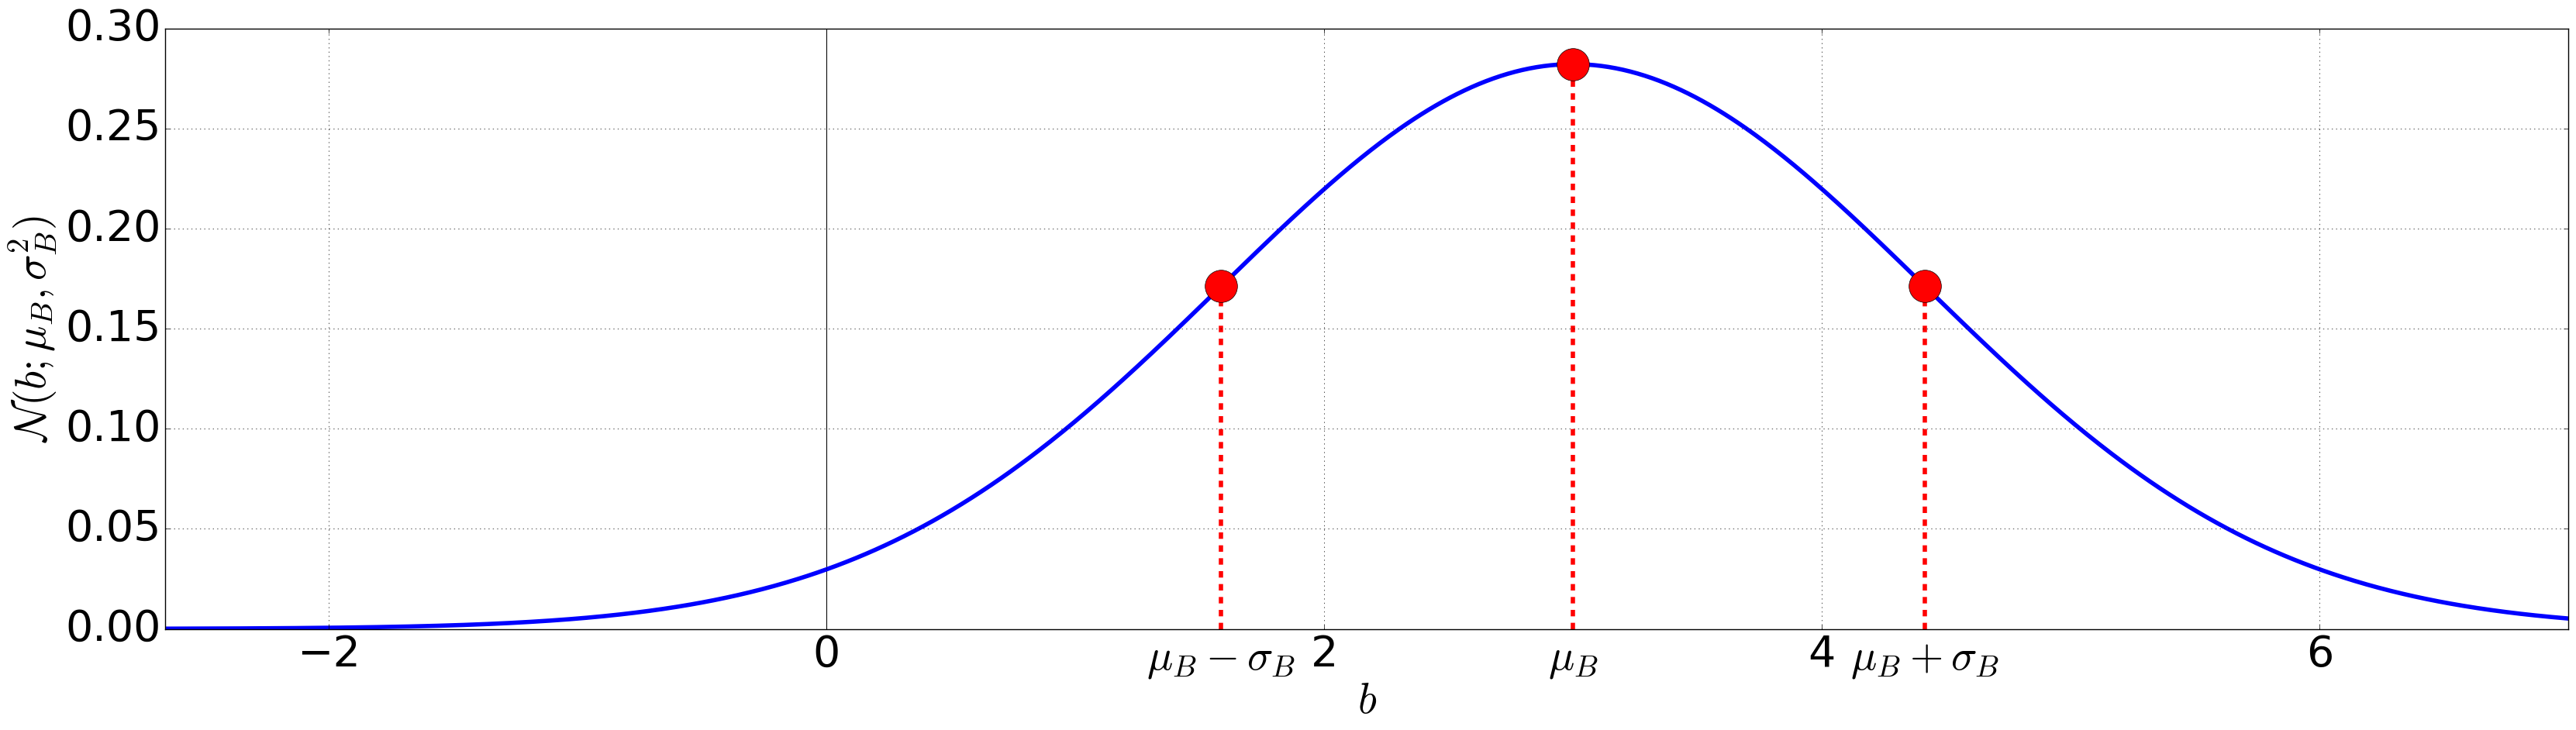

In [51]:
mu_B, var_B = 3, 2
sigma_B = np.sqrt(var_B)
b = mu_B + np.linspace(-4*sigma_B, 4*sigma_B, 1000)

# Die Normalverteilung wird hier durch einen
# Verschiebungsparameter und einen Skalenparameter
# definiert.
p_B = norm(loc=mu_B, scale=sigma_B)

plt.axvline(lw=0.75, c='k')
plt.plot(b, p_B.pdf(b), lw=4)

# points of interest:
pts_oi = np.array([mu_B-sigma_B, mu_B, mu_B+sigma_B])
pts_oi_labels= [r'$\mu_B-\sigma_B$', r'$\mu_B$', r'$\mu_B+\sigma_B$']

plt.plot(pts_oi, p_B.pdf(pts_oi), 'ro', ms=30)
plt.vlines(poi, 0, p_B.pdf(pts_oi), 'r', 'dashed', lw=4)
[plt.text(pt, -0.02, label, ha='center') for label,pt in zip(pts_oi_labels, pts_oi)]

plt.axhline(lw=0.75, c='k')
plt.xlim((min(b), max(b)))
plt.xlabel(r'$b$')
plt.ylabel(r'$\mathcal{N}(b; \mu_B, \sigma_B^2)$')
plt.grid(True)

#### Graph der Verteilungsdichte für die Phase  $p_\Theta(\theta)$

\begin{align}
    p_{\Theta}(\theta) = \mathcal{U}(\theta,-\pi, \pi) = \frac{1}{2 \pi}\mathrm{rect}\left( \frac{\theta}{2 \pi} \right)
\end{align}

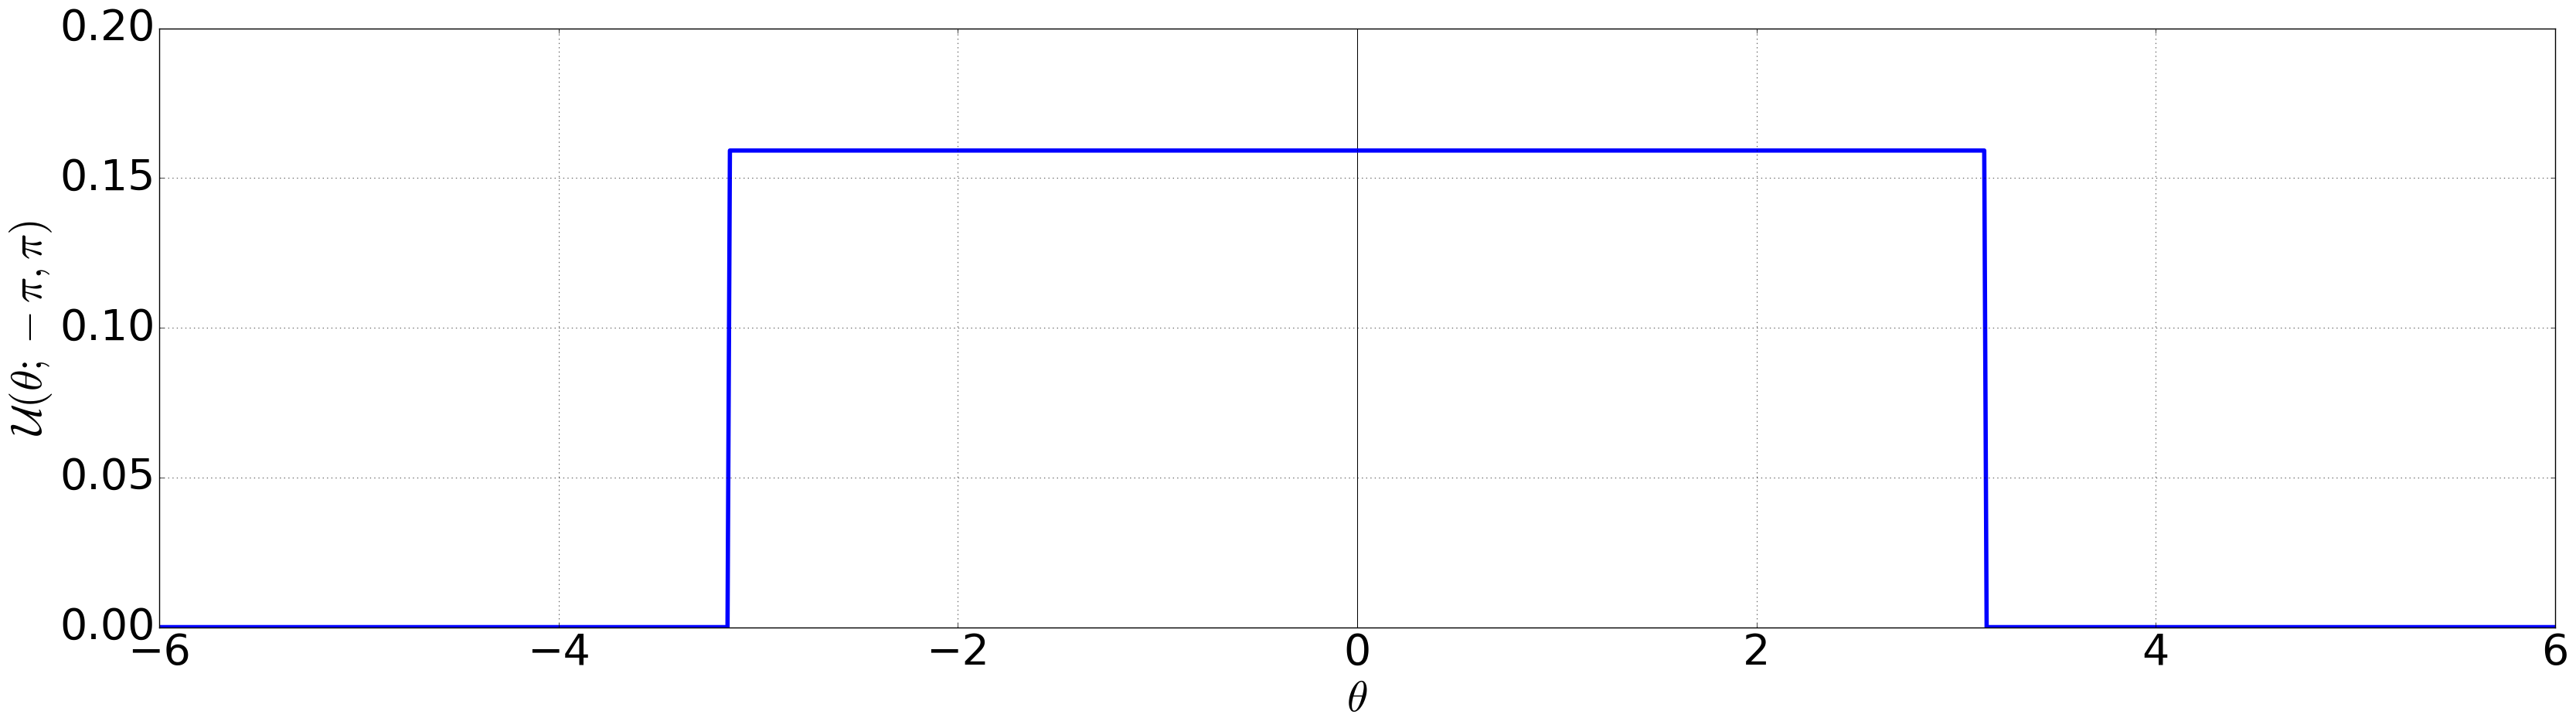

In [16]:
theta = np.linspace(-6,6,1000)
plt.axvline(lw=0.75, c='k')
# Fuer loc=0 lauft uniform.pdf von 0 bis scale,
#also muss pi abgezogen werden.
plt.plot(theta, uniform.pdf(theta, loc=-pi, scale=2*pi), lw=4)
plt.axhline(lw=0.75, c='k')
plt.xlim((min(theta), max(theta)))
plt.ylim((0, 0.2))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\mathcal{U}(\theta; -\pi, \pi)$')
plt.grid(True)

## 11.1:
Berechnen sie den Scharmittelwert $\mathrm{E}\left[X(t)\right]$.

Die Berechnung erfolgt durch Einsetzen. Dabei wird ausgenutzt, dass Amplitude $B$ und Phase $\Theta$ statistisch unabhängig sind, woraus auch die Unkorreliertheit folgt: $\mathrm{E}\left[f(B){\cdot}g(\Theta)\right] = \mathrm{E}\left[f(B)\right]{\cdot}\mathrm{E}\left[g(\Theta)\right]$

\begin{align}
    \mathrm{E}\left[X(t)\right] &=  \mathrm{E}\left[B \sin(\omega_0 t + \Theta)\right] \\
    &= \mathrm{E}\left[B\right]{\cdot}\mathrm{E}\left[\sin(\omega_0 t + \Theta)\right]
\end{align}

Der erster Term ist der Erwartungswert einer normalverteilten Zufallsvariable mit der Dichte $\mathcal{N}(b; \mu_B, \sigma_B^2)$.  
Es gilt also:  $\mathrm{E}\left[ B \right] = \mu_B$.  

Im zweiten Term wird der Erwartungswert über die Funktion der Zufallsvariablen $\Theta$ berechnet:

\begin{align}
    \mathrm{E}\left[\sin(\omega_0 t + \Theta)\right] &= \int_{-\infty}^{\infty} \sin(\omega_0 t + \theta) p_\Theta(\theta) \mathrm{d}\theta \\
    &= \frac{1}{2\pi} \int_{-\infty}^{\infty} \sin(\omega_0 t + \theta) \mathrm{rect}\left( \frac{\theta}{2 \pi} \right) \mathrm{d}\theta \\
    &= \frac{1}{2\pi} \int_{-\pi}^{\pi} \sin(\omega_0 t + \theta) \mathrm{d}\theta = 0.
\end{align}

Dies folgt, weil unabhängig vom Wert von $\omega_0 t$ über eine komplette Periode integriert wird. Deshalb gilt:

\begin{align}
    \Rightarrow \mathrm{E}\left[X(t)\right] = \mu_B\cdot 0 = 0 \ \forall t
\end{align}

Das Signal ist also nicht nur entlang der Zeitachse, sondern auch bei Mittelung über alle möglichen Werte der Zufallsvariablen mittelwertfrei.

## 11.2:
Berechnen sie die Autokorrelationsfunktion (AKF) $\varphi_{XX}(t_1, t_2)$ von $X(t)$.

#### AKF für Zufallsprozesse
Bei Zufallsprozessen ist die AKF als Mittelung über die Zufallsvariablen definiert:

\begin{align}
    \varphi_{XX}(t_1, t_2) = \mathrm{E}\left[X^\ast(t_1)X(t_2) \right]
\end{align}

mit der Umparametrierung $t_1 \overset{!}{=} t$ und $t_2 \overset{!}{=} t+\tau$ erreicht man eine gewohntere Darstellung durch Absolutzeit und Verschiebezeit:

\begin{align}
    \varphi_{XX}(t, t+\tau) = \mathrm{E}\left[X^\ast(t)X(t+\tau) \right]
\end{align}

Bei Vergleich mit der Formel für Leistungssignale

\begin{align}
    \varphi^L_{xx}(\tau) = \lim_{T \rightarrow \infty} \int_{-T/2}^{T/2} x^\ast(t)x(t+\tau) \mathrm{d}t \overset{!}{=}  \overline{x^\ast(t)x(t+\tau)}
\end{align}

fällt auf, dass nur der Mittelwertoperator verändert wurde: Statt einer Zeitmittelung wird nun eine Scharmittelung durchgeführt! Deshalb bleibt die Interpretation dieselbe: Die AKF misst die Ähnlichkeit eines Signals zu einer verschobeben Version seiner selbst.

Zur Lösung der Teilaufgabe wird nun einfach eingesetzt, wobei die Reellwertigkeitdes Signals $X(t)$ genutzt wird:

\begin{align}
    \varphi_{XX}(t, t+\tau) &= \mathrm{E}\left[X(t)X(t+\tau) \right] \\
    &= \mathrm{E}\left[ B \sin(\omega_0 t + \Theta) B \sin(\omega_0 (t +\tau) + \Theta) \right] \\
    &= \mathrm{E}\left[B^2\right]{\cdot}\mathrm{E}\left[\sin(\omega_0 t + \Theta)\sin(\omega_0 (t +\tau) + \Theta) \right]
\end{align}

Dabei wurde wieder die Unkorreliertheit von $B$ und $\Theta$ verwendet. 
Der erste Faktor ist die Leistung einer normalverteilten Zufallsvariable, für die laut Skript gilt:

\begin{align}
    \mathrm{E}\left[B^2\right] = \mu_B^2 + \sigma_B^2
\end{align}

Der zweite Faktor lässt sich über den Hinweis mit $a=t+\tau$ und $b=t$ bestimmen:

\begin{align}
    \mathrm{E}\left[\sin(\omega_0 t + \Theta)\sin(\omega_0 (t +\tau) + \Theta) \right]
        &= \mathrm{E}\left[\frac{1}{2}\left(\cos( (\omega_0 (t +\tau) + \Theta) - (\omega_0 t + \Theta) ) - \cos( (\omega_0 (t +\tau) + \Theta) - (\omega_0 t + \Theta) ) \right) \right] \\
        &= \frac{1}{2}\left(\mathrm{E}\left[\cos( \omega_0\tau)\right] - \mathrm{E}\left[\cos( \omega_0 (2t +\tau) + 2\Theta))\right] \right) \\
        &= \frac{1}{2}\cos( \omega_0\tau)
\end{align}

Beim ersten Summanden wird über eine deterministische Funktion gemittelt, weshalb der Erwartungswertoperator einfach gestrichen werden kann. Beim zweiten Summanden wird über zwei Perioden des Kosinus gemittelt, weshalb der Erwartungswert wie in Teilaufgabe 11.1 den Wert Null ergibt. Insgesamt folgt:

\begin{align}
    \varphi_{XX}(t,t+\tau) = \varphi_{XX}(\tau) = \frac{\mu_B^2 + \sigma_B^2}{2}\cos( \omega_0\tau)
\end{align}

#### Graph der Autokorrelationsfunktion $\varphi_{XX}(\tau)$:

\begin{align}
    T= \frac{2 \pi}{\omega_0}
\end{align}

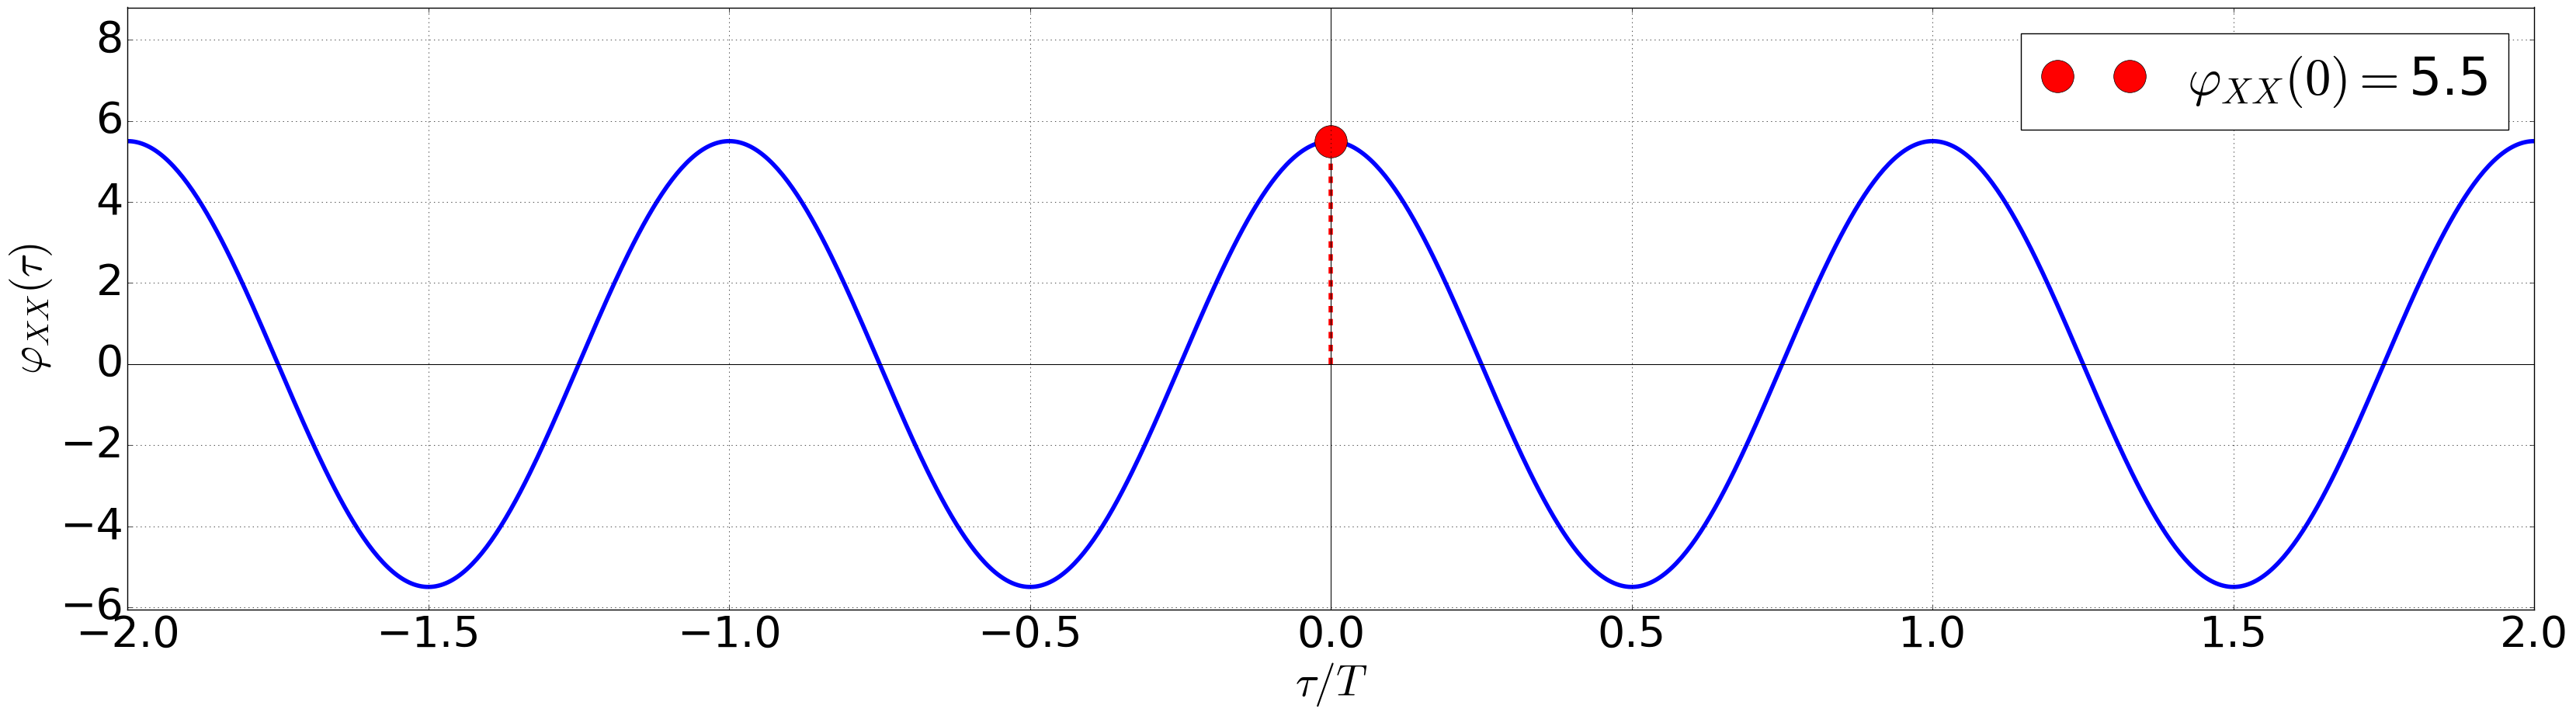

In [26]:
power_x = (mu_B**2 + var_B)/2

omega_0 = 5
T=2*pi/omega_0
tau = np.linspace(-2*T, 2*T, 1000)

phi_xx = power_x*np.cos(omega_0*tau)

plt.axvline(lw=0.75, c='k')
plt.plot(tau/T, phi_xx, lw=4)
plt.plot([0], [power_x], 'ro', ms=30, label=r'$\varphi_{XX}(0)=$'+'{}'.format(power_x))
plt.vlines([0], 0, [power_x], 'r', 'dashed', lw=4)
plt.axhline(lw=0.75, c='k')

plt.xlabel(r'$\tau/T$')
plt.ylabel(r'$\varphi_{XX}(\tau)$')
plt.xlim((-2, 2))
plt.ylim((-1.1*power_x, 1.6*power_x))
plt.legend()
plt.grid(True);

## 11.3:
Ist der Prozess $X(t)$ schwach stationär?

#### Stationäre Zufallsprozesse
Ein Zufallsprozess ist dann stationär, wenn die Verbundverteilungsdichtefunktion zwischen **beliebigen Mengen von Werten zu beliebigen Zeitpunkten** unabhängig von der absoluten Zeit ist. Äquivalent muss man zeigen, dass **alle Momente** (von denen es unendlich viele geben kann) **nicht von der absoluten Zeit abhängen**. Dieses Kriterium ist meistens schwer zu zeigen.

Hier ist jedoch nur gefragt, ob der Prozess **schwach stationär** ist. Bei einem schwach stationären Prozess müssen lediglich die ersten beiden Momente unabhängig von der absoluten Zeit sein, d.h. **der Erwartungswert muss zeitlich konstant sein** und **die AKF darf nur abhängig sein von der Zeitverschiebung** zwischen den beiden Zeitpunkten, die Vergleichen werden. 
Es müssen aber **immer beide Momente** herangezogen werden!

Für den vorliegenden Prozess ist in den ersten beiden Teilaufgaben gezeigt worden:

\begin{align}
    \mathrm{E}\left( X(t) \right] &= 0 \ \forall t \\
    \varphi_{XX}(t,t+\tau) = \varphi_{XX}(\tau) &= \frac{\mu_B^2 + \sigma_B^2}{2}\cos( \omega_0\tau)
\end{align}

Der Erwartungswert ist also konstant und die AKF hängt nur von der Zeitverschiebung ab.
Der Prozess $X(t)$ **ist damit schwach stationär**.

## 11.4:
Bestimmen sie das Leistungsdichtespektrum (LDS) $\Phi_{XX}(j\omega)$ des Bandpasssignals $X(t)$.

#### Leistungsdichtespektrum eines Zufallsprozesses
Das Leistungsdichtespektrum mit einem einzelnen Argument $j\omega$ ist nur für schwach stationäre Zufallsprozesse sinnvoll. Es lässt sich in diesem Fall durch das **Wiener-Khinchine-Theorem** berechnen:

\begin{align}
    \Phi_{XX}(j\omega) = \mathcal{F} \left\{ \varphi_{XX}(\tau) \right\}
\end{align}

Für Zufallsprozesse ist die Fouriertransformierte des Zeitsignals nicht sinnvoll definiert, da nicht garantiert ist, dass das Fourierintegral konvergiert. Deshalb wird Leistungsdichtespektrum wird bestimmt, um auch für Zufallsprozesse Aussagen über die Bandbreite oder die Auswirkungen eines nachrichtentechnischen Systems im Frequenzbereich treffen zu können. Weiterhin gilt die **Wiener-Lee-Beziehung für LTI-Systeme**:

\begin{align}
    Y(t) = h(t) \ast X(t) \qquad \Leftrightarrow \qquad \Phi_{YY}(j\omega) = \left|H(j\omega)\right|^2 \Phi_{XX}(j\omega)
\end{align}

Für das gegebene Signal ergibt sich:
    
\begin{align}
    \Phi_{XX}(j\omega) &= \mathcal{F} \left\{ \frac{\mu_B^2 + \sigma_B^2}{2} \cos( \omega_0\tau) \right\} \\
    &= \frac{\mu_B^2 + \sigma_B^2}{2} \mathcal{F} \left\{ \cos( \omega_0\tau) \right\} \\
    &= \frac{\mu_B^2 + \sigma_B^2}{2} \pi \left( \delta(\omega - \omega_0) + \delta(\omega + \omega_0) \right)
\end{align}

Es ergibt sich also ein Linienspektrum, was bei der Form des Zufallsprozesses auch zu erwarten war. Insbesondere ist die Klassifizierung als Bandpasssignal gerechtfertigt.

#### Graph des Leistungsdichtespektrums:

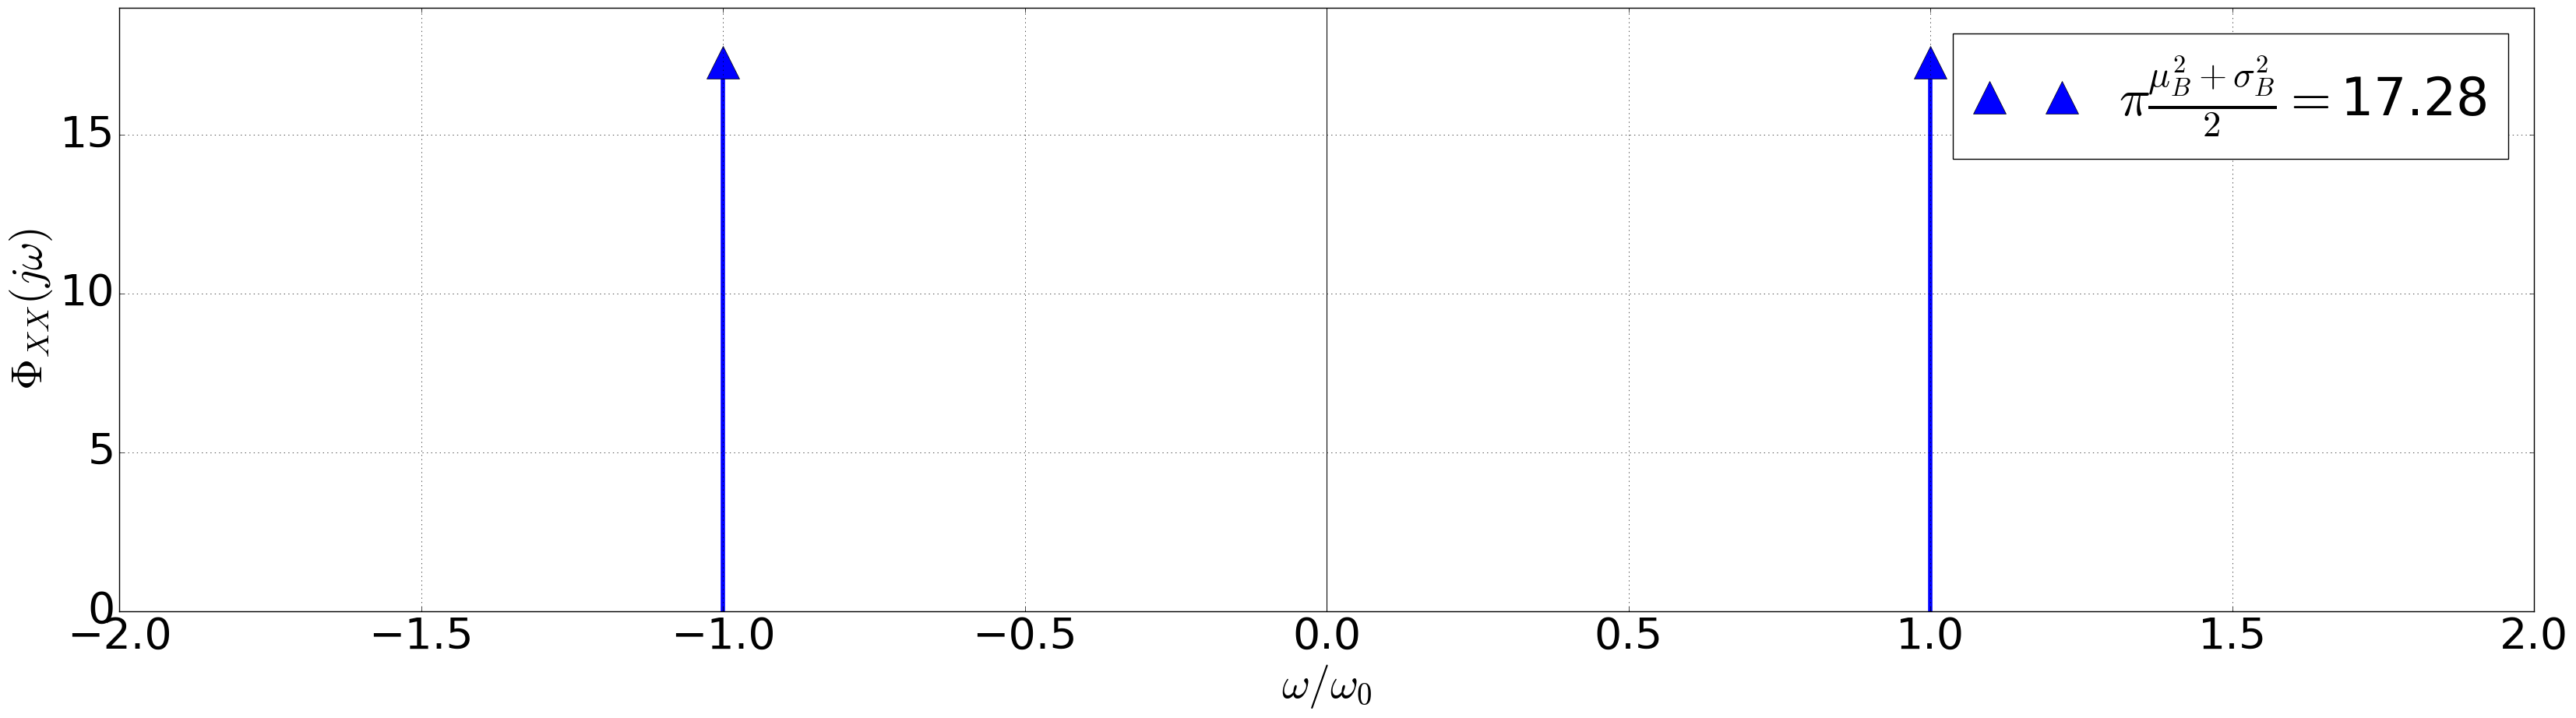

In [35]:
weight_factor = pi*power_x

plt.axvline(lw=0.75, c='k')

plt.plot([-1, 1], [weight_factor, weight_factor], 'b^', ms=30,
         label=r'$\pi\frac{\mu_B^2 + \sigma_B^2}{2}=$'+'{:2.2f}'.format(weight_factor))
plt.vlines([-1, 1], 0, [weight_factor, weight_factor], 'b', lw=4)
plt.axhline(lw=0.75, c='k')
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\Phi_{XX}(j\omega)$')
plt.xlim((-2, 2))
plt.ylim((0, 1.1*weight_factor))
plt.legend()
plt.grid(True);

## 11.5
Ist der Zufallsprozess $X(t)$ ergodisch?

#### Ergodizität

Zufallsprozesse heißen dann ergodisch, wenn die Mittelung über eine beliebige Funktion des Zufallsprozesses entlang der Zeit oder über alle Realisierungen ${}^kx(t)$ des Prozesses durchgeführt werden kann und jeweils dasselbe Ergebnis herauskommt.Das heißt formal:

\begin{align}
    \text{X(t) ergodisch} \qquad \Leftrightarrow  \qquad \forall f, k:\ 
    \mathrm{E}\left[ f(X(t)) \right] &\overset{!}{=} \overline{f\left({}^kx(t)\right)}\\ \\
    \text{  mit }\qquad  \overline{f\left({}^kx(t)\right)} = \lim_{T \rightarrow \infty} \frac{1}{T} \int_{-T/2}^{T/2} f\left({}^kx(t)\right)\ \mathrm{d}t
\end{align}

Dies kann natürlich nur erfüllt werden, wenn der Prozess ohnehin schon (streng!) stationär ist, da sonst die linke Seite der Gleichung von der Zeit abhinge, die rechte aber nicht.

Strenge Stationarität ist aber nur notwendig, jedoch keinesfalls hinreichend. Damit ist es sehr schwierig, Ergodizität in einem konkreten Fall nachzuweisen. 

Wenn nach der Ergodizität eines Prozesses gefragt wird, sollte man also nach einem Gegenbeispiel suchen, um die Nichtergodizität des Prozesses zu beweisen.

Für den gegebenen Zufallsprozess lässt sich ein solches Gegenbeispiel relativ einfach angeben: 
 - Als Funktion wird $f(x) = x^2$ gewählt. Es werden also die mittlere Momentanleistung des Zufallsprozesses und die Leistung der Musterrealisierung im zeitlichen Mittel miteinander verglichen
 - Als Musterrealisierung wird ${}^kx(t) = 0$ gewählt. Dies kann z.B. durch $B=0$ auftreten.

Die mittlere Momentanleistung des Prozesses ist durch die AKF an der Stelle $\tau=0$ gegeben:

\begin{align}
    P_{X}(t) = \left. \varphi_{XX}(t, t+\tau)\right|_{\tau=0} = \varphi_{XX}(0) = \frac{\mu_B^2 + \sigma_B^2}{2}
\end{align} 

Die Leistung der Musterrealisierung $P_{ {}^kx } = \overline{\left({}^kx(t)\right)^2} = \overline{0}$ ist auch im zeitlichen Mittel $0$. Damit ergeben sich unterschiedliche Werte und **der Prozess kann nicht ergodisch sein**.

## 11.6:
Geben sie die AKF der Hilberttransformierten $\hat{X}(t)$ in Abhängigkeit von der AKF des Bandpasssignals $X(t)$ an.

Die Teilaufgabe lässt sich am bequemsten im Frequenzbereich lösen.
Die Hilberttaransformation lässt sich als LTI-System schreiben:

\begin{align}
    \hat{x}(t) = \mathcal{H}\left\{ x(t) \right\} = h_H(t) \ast x(t)
\end{align}

Daraus folgt im Frequenzbereich:
\begin{align}
    \hat{X}(j\omega) = H_H(j\omega) X(j\omega) \qquad \text{ mit } \qquad H_H(j\omega) = -j\mathrm{sgn}(\omega)
\end{align}    

Für die Leistungsdichtespektren gilt die Wiener-Lee-Beziehung:
    
\begin{align}
    \Phi_{\hat{X}\hat{X}}(j\omega) = \underbrace{\left|H_H(j\omega)\right|^2}_{=1\ \forall \omega\neq0}{\cdot}\Phi_{XX}(j\omega) = \Phi_{XX}(j\omega) \ \forall \omega \neq 0
\end{align}

Die Gleichheit gilt nur auf der Nullmenge $\left\{\omega = 0 \right\}$ nicht. Mit dem Wiener-Khinchine-Theorem folgt deswegen im (Verschiebungs-)Zeitbereich:

\begin{align}
    \varphi_{\hat{X}\hat{X}}(\tau) = \varphi_{XX}(\tau) = \frac{\mu_B^2 + \sigma_B^2}{2} \cos( \omega_0\tau)
\end{align}

## 11.7
Geben sie das LDS $\Phi_{X^+X^+}(j\omega)$ des analytischen Signals $X^+(t)$ als Funktion des LDS $\Phi_{XX}(j\omega)$ des Bandpasssignals $X(t)$ an.

Der Zusammenhang zwischen einem Bandpassisgnal und seinem zugehörigen analytischen Signal lautet im Spektralbereich
    
\begin{align}
    X^+(j\omega) = \sqrt{2}\epsilon(\omega) X(j\omega),
\end{align}

ist also auch dir ein LTI-System mit der Übertragungsfunktion $H^+(j\omega) = \sqrt{2}\epsilon(\omega)$ gegeben. 

Mit der Wiener-Lee-Beziehung ergibt sich deshalb:

\begin{align}
    \Phi_{X^+X^+}(j\omega) = \left| H^+(j\omega)\right|^2 {\cdot} \Phi_{XX}(j\omega) = 2\epsilon(\omega)\Phi_{XX}(j\omega)
\end{align}

#### LDS $\Phi_{X^+X^+}(j\omega)$ des analytischen Signals $X^+(t)$:

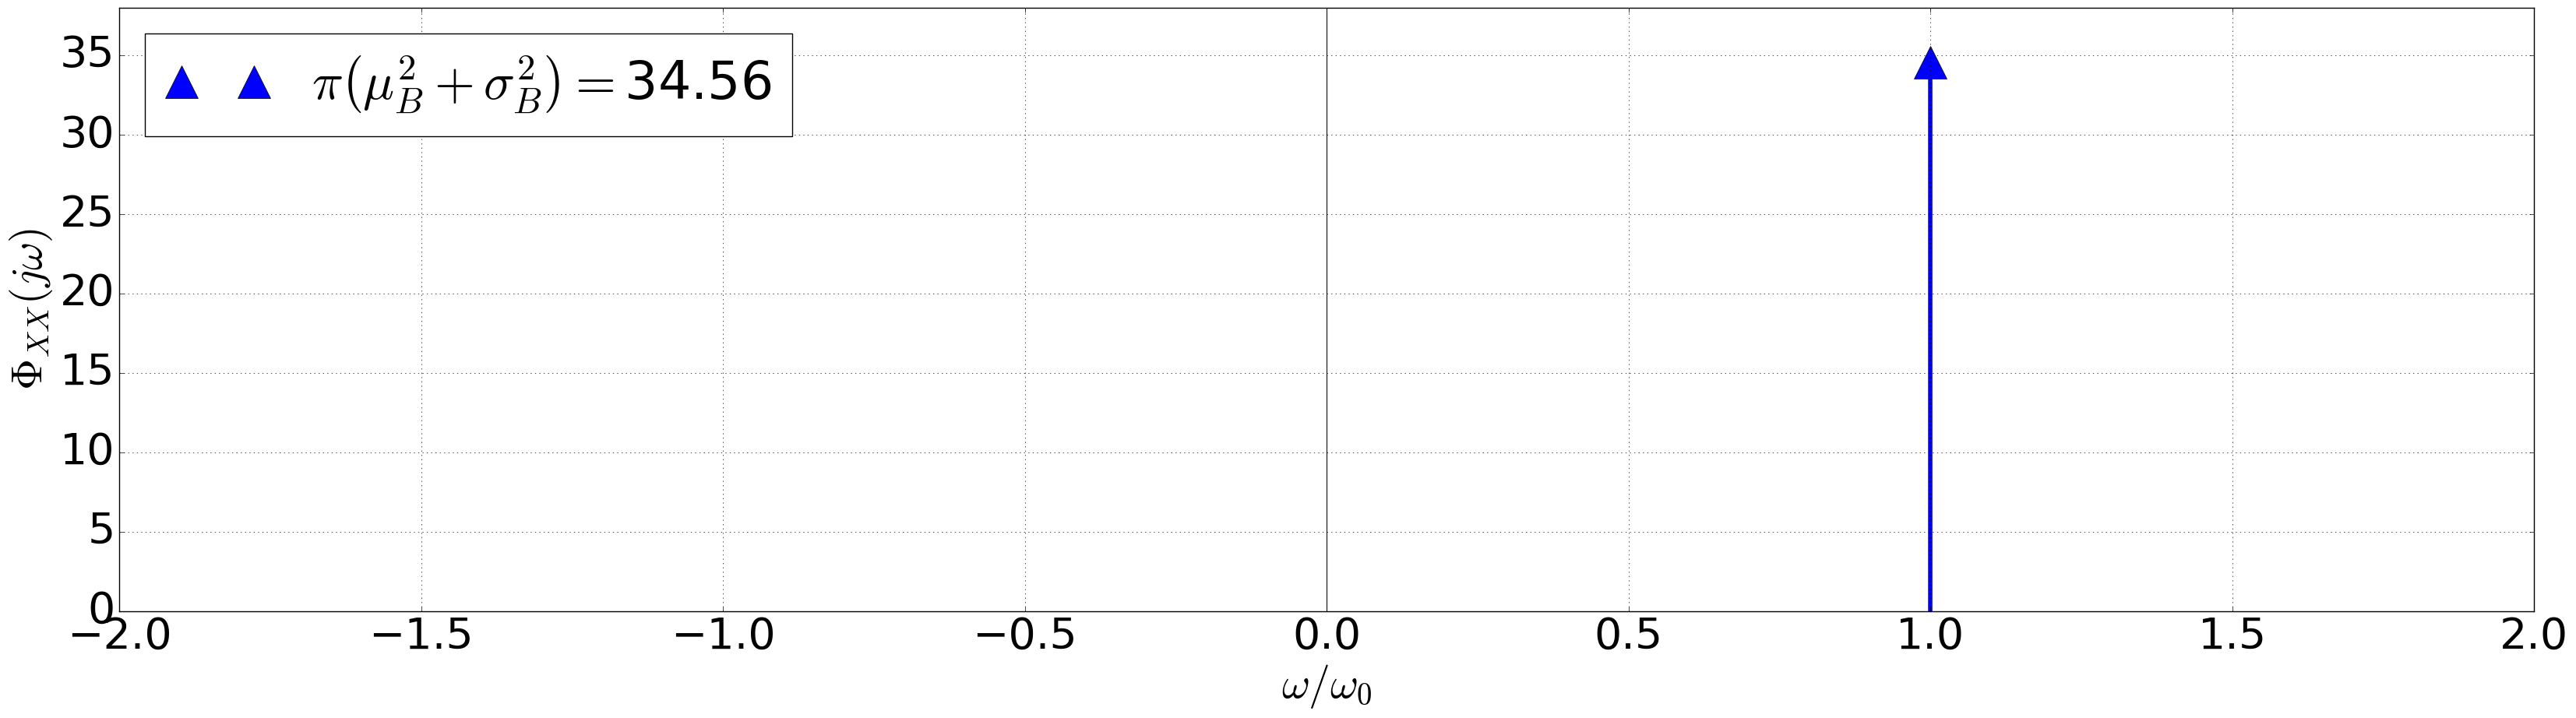

In [41]:
plt.axvline(lw=0.75, c='k')
plt.plot([1], [2*weight_factor], 'b^', ms=30,
         label=r'$\pi\left(\mu_B^2 + \sigma_B^2\right)=$'+'{:2.2f}'.format(2*weight_factor))
plt.vlines([1], 0, [2*weight_factor], 'b', lw=4)
plt.axhline(lw=0.75, c='k')

plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\Phi_{XX}(j\omega)$')
plt.xlim((-2, 2))
plt.ylim((0, 1.1*2*weight_factor))
plt.legend(loc='upper left')
plt.grid(True);